In [ ]:
import nltk
from nltk.corpus import stopwords
import re
import joblib
from keras.preprocessing.text import Tokenizer
import gensim
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP/training.csv', encoding='latin', header=0)
df.head(8)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it


In [ ]:
columns=['target','ids','date','flag','user','text']
df.columns = columns
df.target.replace({0:'Negative',2:'Neutral',4:'Positive'},inplace=True)

In [ ]:
df.head()
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',df['text'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
df.text=corpus

In [ ]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.20,random_state=123)

In [ ]:
train_df.head()

,target,ids,date,flag,user,text
1559756,Positive,2186152631,Mon Jun 15 18:25:53 PDT 2009,NO_QUERY,blinkxxatl,vicktcobra u guys tour right soon
51568,Negative,1679002557,Sat May 02 08:17:24 PDT 2009,NO_QUERY,David_Kelly,good blog posts recently twitter dry grimeforu...
569210,Negative,2207868153,Wed Jun 17 08:29:12 PDT 2009,NO_QUERY,Kristipalooza,brendo noooooooooooooooooooo howww earth could...
71896,Negative,1694083982,Mon May 04 01:00:47 PDT 2009,NO_QUERY,GillianMe,awww sandi sorry u r not well sore underarm gl...
405089,Negative,2058584395,Sat Jun 06 15:13:46 PDT 2009,NO_QUERY,is_selene,girl burns kitten alive oven quot practical jo...


In [ ]:
test_df.head()

,target,ids,date,flag,user,text
448282,Negative,2068921344,Sun Jun 07 14:56:43 PDT 2009,NO_QUERY,gemmagreeb,tired ive like 7hrs sleep past 2 nights not go...
648495,Negative,2237041125,Fri Jun 19 05:04:02 PDT 2009,NO_QUERY,gopaldass,shucks missed key event week gt gt moan lt lt
132529,Negative,1835775067,Mon May 18 06:43:29 PDT 2009,NO_QUERY,suedahlgren,nice 75 degree days could use weeks gonna c da...
182348,Negative,1967122225,Fri May 29 19:00:48 PDT 2009,NO_QUERY,sarahleefitz,spikey dikey last friday night burg way coldst...
907612,Positive,1695846131,Mon May 04 07:04:29 PDT 2009,NO_QUERY,Digidreams,good mornin


In [ ]:
documents = [text.split() for text in train_df.text]
w2v_model = gensim.models.word2vec.Word2Vec(size=300,
                                            window=7,
                                            min_count=10,
                                            workers=8)
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30357


In [ ]:
w2v_model.train(documents, total_examples=len(documents), epochs=30)

(248038748, 279454290)

In [ ]:
w2v_model.wv.most_similar("good")

[('great', 0.6856421232223511),
 ('bad', 0.5562549233436584),
 ('goood', 0.5377055406570435),
 ('nice', 0.5013444423675537),
 ('goooood', 0.49326708912849426),
 ('gooood', 0.4908473789691925),
 ('gooooood', 0.4809979796409607),
 ('rough', 0.4754399061203003),
 ('wonderful', 0.4710865616798401),
 ('gud', 0.4557993412017822)]

In [ ]:
w2v_model.wv.most_similar("hate")

[('hates', 0.5490170121192932),
 ('sucks', 0.5087411999702454),
 ('stupid', 0.4698692262172699),
 ('suck', 0.4630446434020996),
 ('h8', 0.44515493512153625),
 ('despise', 0.44375279545783997),
 ('dislike', 0.4311303198337555),
 ('hating', 0.413593053817749),
 ('ugh', 0.39889100193977356),
 ('depressing', 0.38362061977386475)]

In [ ]:
w2v_model.wv.most_similar("great")

[('fantastic', 0.7270028591156006),
 ('wonderful', 0.7000929713249207),
 ('awesome', 0.6955955624580383),
 ('good', 0.6856421232223511),
 ('amazing', 0.6438149809837341),
 ('fabulous', 0.6413958668708801),
 ('fab', 0.5956254005432129),
 ('nice', 0.5734556913375854),
 ('excellent', 0.5689972639083862),
 ('gr8', 0.5498502254486084)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df.text)

In [ ]:
tokenizer.word_index

{'not': 1,
 'good': 2,
 'day': 3,
 'get': 4,
 'like': 5,
 'go': 6,
 'quot': 7,
 'today': 8,
 'work': 9,
 'love': 10,
 'going': 11,
 'got': 12,
 'lol': 13,
 'time': 14,
 'back': 15,
 'u': 16,
 'one': 17,
 'know': 18,
 'im': 19,
 'really': 20,
 'amp': 21,
 'see': 22,
 'night': 23,
 'still': 24,
 '2': 25,
 'well': 26,
 'want': 27,
 'new': 28,
 'think': 29,
 'home': 30,
 'thanks': 31,
 'oh': 32,
 'much': 33,
 'miss': 34,
 'need': 35,
 'last': 36,
 'morning': 37,
 'tomorrow': 38,
 'hope': 39,
 'great': 40,
 'twitter': 41,
 '3': 42,
 'haha': 43,
 'feel': 44,
 'sad': 45,
 'fun': 46,
 'wish': 47,
 'sleep': 48,
 'right': 49,
 'bad': 50,
 'would': 51,
 'happy': 52,
 'sorry': 53,
 'tonight': 54,
 'come': 55,
 'make': 56,
 'way': 57,
 'getting': 58,
 'gonna': 59,
 'though': 60,
 'nice': 61,
 'better': 62,
 'watching': 63,
 'yeah': 64,
 'wait': 65,
 'bed': 66,
 'could': 67,
 'week': 68,
 'school': 69,
 'people': 70,
 'hate': 71,
 'even': 72,
 'hey': 73,
 'days': 74,
 'yes': 75,
 '4': 76,
 'next': 7

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

290802

In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df.text), maxlen=300)
X_train

array([[     0,      0,      0, ...,    533,     49,     84],
       [     0,      0,      0, ...,    619,    274,    417],
       [     0,      0,      0, ...,      1,      4,    302],
       ...,
       [     0,      0,      0, ...,   6270,    197, 290801],
       [     0,      0,      0, ...,     49,     19,    476],
       [     0,      0,      0, ...,    324,  11089,    110]], dtype=int32)

In [ ]:
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df.text), maxlen=300)
X_test

array([[   0,    0,    0, ...,   48,   14,  730],
       [   0,    0,    0, ..., 9489,   79,   79],
       [   0,    0,    0, ...,  310,    3,  235],
       ...,
       [   0,    0,    0, ...,    0,  684,  684],
       [   0,    0,    0, ...,    1,   11,   26],
       [   0,    0,    0, ...,   37, 1841, 2107]], dtype=int32)

In [ ]:
y_train=train_df.target
y_train.head()

1559756    Positive
51568      Negative
569210     Negative
71896      Negative
405089     Negative
Name: target, dtype: object

In [ ]:
y_test=test_df.target
y_test.head()

448282    Negative
648495    Negative
132529    Negative
182348    Negative
907612    Positive
Name: target, dtype: object

In [ ]:
#Encoding the Categorical target into 0 and 1

labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)

In [ ]:
y_train.shape

(1279999,)

In [ ]:
y_test.shape

(320000,)

In [ ]:
import numpy as np
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290802, 300)


In [ ]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          87240600  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 87,401,101
Trainable params: 160,501
Non-trainable params: 87,240,600
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model_history=model.fit(X_train, y_train,batch_size=1024,epochs=7,validation_split=0.1,verbose=1)

Epoch 1/7
1125/1125 [==============================] - 1096s 970ms/step - loss: 0.4956 - accuracy: 0.7568 - val_loss: 0.4576 - val_accuracy: 0.7849
Epoch 2/7
1125/1125 [==============================] - 1082s 961ms/step - loss: 0.4689 - accuracy: 0.7745 - val_loss: 0.4465 - val_accuracy: 0.7892
Epoch 3/7
1125/1125 [==============================] - 1079s 959ms/step - loss: 0.4612 - accuracy: 0.7790 - val_loss: 0.4446 - val_accuracy: 0.7923
Epoch 4/7
1125/1125 [==============================] - 1081s 961ms/step - loss: 0.4579 - accuracy: 0.7813 - val_loss: 0.4407 - val_accuracy: 0.7939
Epoch 5/7
1125/1125 [==============================] - 1080s 960ms/step - loss: 0.4548 - accuracy: 0.7827 - val_loss: 0.4399 - val_accuracy: 0.7949
Epoch 6/7
1125/1125 [==============================] - 1079s 959ms/step - loss: 0.4534 - accuracy: 0.7838 - val_loss: 0.4383 - val_accuracy: 0.7947
Epoch 7/7
1125/1125 [==============================] - 1088s 967ms/step - loss: 0.4519 - accuracy: 0.7848 - val_

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

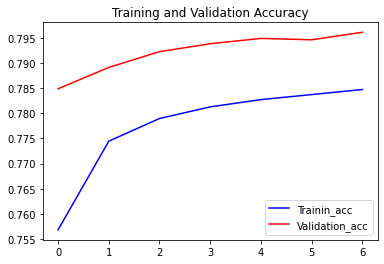

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

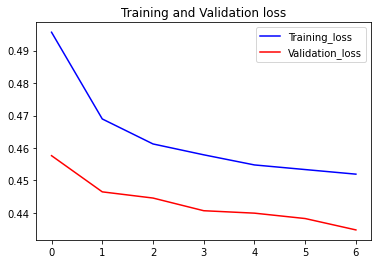

In [ ]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [ ]:
def preprocess(text):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',text)
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    print(review)
    review=pad_sequences(tokenizer.texts_to_sequences([review]), maxlen=300)
    return review

In [ ]:
def prediction(review):
    review=preprocess(review)
    score=model.predict(review)
    score=score[0]
    if score<0.4:
        print("Negative")
    elif score>0.4 and score<0.6:
        print("Neutral")
    else:
        print("Positive")
    print(score)

In [ ]:
prediction("the food is not bad")

['food', 'not', 'bad']
Neutral
[0.5712143]


In [ ]:
prediction("the film was horrible")

['film', 'horrible']
Negative
[0.05541886]


In [ ]:
scores = model.predict(X_test, verbose=1, batch_size=1024)

313/313 [==============================] - 24s 76ms/step


In [ ]:
scores

array([[0.15089989],
       [0.07237649],
       [0.8130911 ],
       ...,
       [0.27113917],
       [0.13775143],
       [0.9953329 ]], dtype=float32)

In [ ]:
y_pred=np.where(scores>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[127194  32100]
 [ 32726 127980]]


In [ ]:
print(accuracy_score(y_pred,y_test))

0.79741875


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80    159920
           1       0.80      0.80      0.80    160080

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

